In [54]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%config Completer.use_jedi = False

For a recap, we use “Yahoo! Music user ratings of musical tracks, albums, artists and genres”.dataset. This dataset is available through yahoo website, but requires additional registration and request filling.


The data is distributed in an archive and contains data for two competition tracks. In dataset for the first track of competition, there is information about 1mln user interacting with 600k items, which is unmanageable with our limited resources. For this reason, we decided to use the data for the second track, which contains information about 250k users interacting with 300k items.

Next, lets investigate the distribution of tracks scores given by users of Yahoo platform.

In [3]:
scores = np.load("./Data/scores_numpy.npy")

It can be seen that users generally either like an item and give it 100% or don't like it giving 0% to the item.

/Users/ppogorelov/VirtualEnv/v2/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

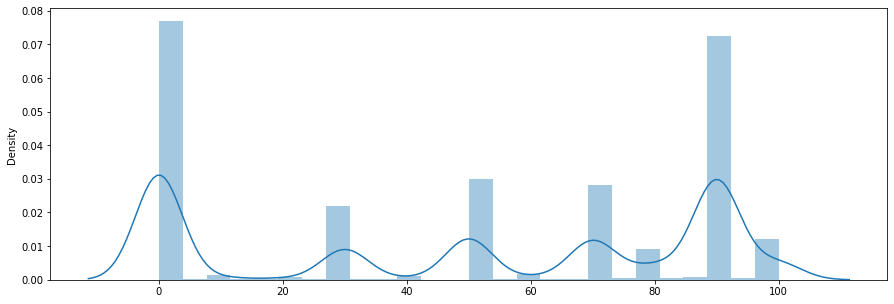

In [55]:
# the dataset is quite big, so we sample some data for analysis
scores_sample = np.random.choice(scores, 100000, replace=False)

plt.figure(figsize=(15, 5))
sns.distplot(scores_sample)

Next, let's check the interactions data. The number of interactions of users with particular items is highly skewed as expected.It is a good idea to clear outliers and set a threshold around 1000 to filter out users who could damage the recommendation system.

In [19]:
user_item_interactions = np.load("./Data/interactions_numpy.npy")

In [34]:
_, cnts_users = np.unique(user_item_interactions[:, 0], return_counts=True)

/Users/ppogorelov/VirtualEnv/v2/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

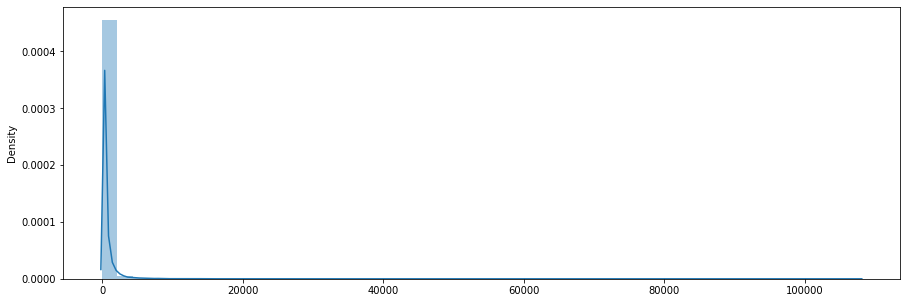

In [27]:
plt.figure(figsize=(15, 5))
sns.distplot(cnts_users)

After thresholding users to have a number of interactions less than 1000, the distribution start to appear more organic.

/Users/ppogorelov/VirtualEnv/v2/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

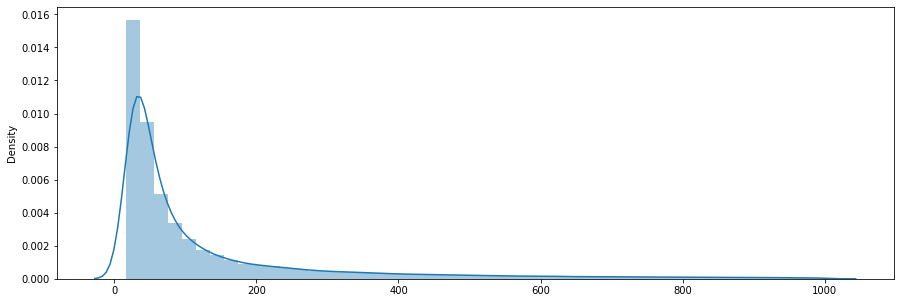

In [33]:
plt.figure(figsize=(15, 5))
sns.distplot(cnts_users[cnts_users < 1000])

If we plot the distribution of interactions per track, the distribution would exhibit the same image that the distribution of user plays had. And it is quite natural to have a small number of popular tracks, and bunch of non-popular tracks. 

In [35]:
_, cnts_tracks = np.unique(user_item_interactions[:, 1], return_counts=True)

/Users/ppogorelov/VirtualEnv/v2/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

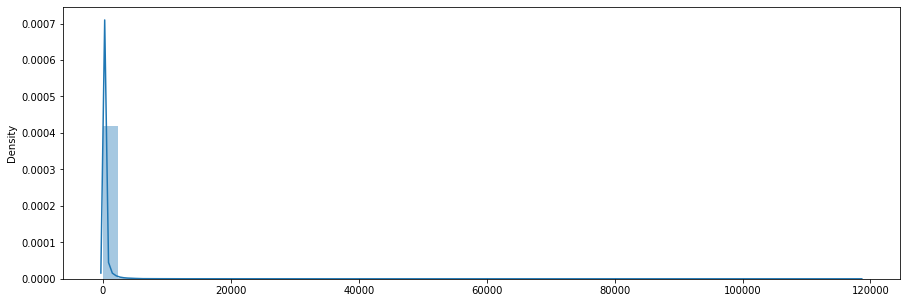

In [37]:
plt.figure(figsize=(15, 5))
sns.distplot(cnts_tracks)

All in all, 97% of tracks (287223) account for 47% (29572182) plays, while 3% (8888) account for 53% (32372224) plays.

In [51]:
cnts_tracks[cnts_tracks < np.quantile(cnts_tracks, 0.97)].sum()

29572182

In [52]:
cnts_tracks[cnts_tracks >= np.quantile(cnts_tracks, 0.97)].sum()

32372224

In [53]:
29572182 / (29572182 + 32372224)

0.47739875009859645